     surface  best_of  tourney_round  a_player_age  a_player_rank  \
5373    Hard      3.0            0.8          28.0           74.0   
5375    Hard      3.0            0.8          25.0           46.0   
5378    Hard      3.0            0.8          24.0           48.0   
5381    Hard      3.0            0.8          27.0           38.0   
5382    Hard      3.0            0.8          29.0           57.0   

      a_player_rank_points  b_player_age  b_player_rank  b_player_rank_points  \
5373                 671.0          23.0           15.0                1925.0   
5375                 920.0          28.0           65.0                 755.0   
5378                 915.0          26.0           83.0                 640.0   
5381                1015.0          28.0           65.0                 755.0   
5382                 828.0          27.0           38.0                1015.0   

      rank_diff  ...  a_surface_second_won_glicko_rd  \
5373       59.0  ...                      

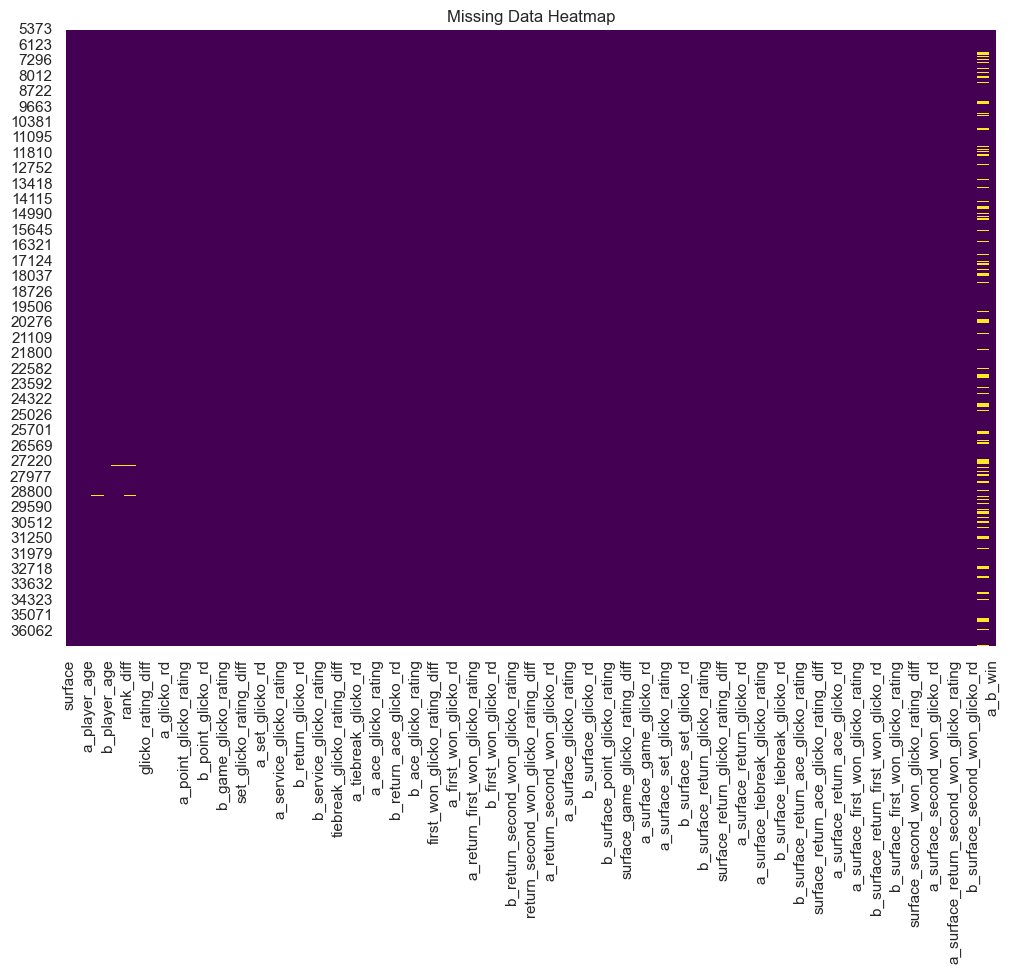

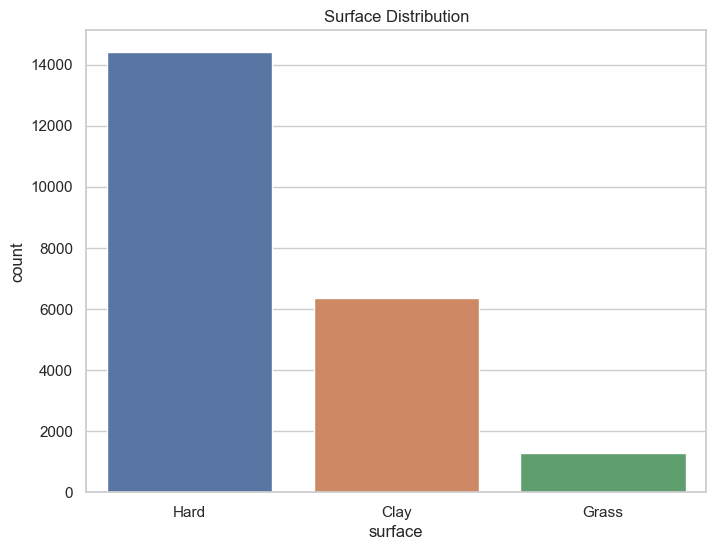

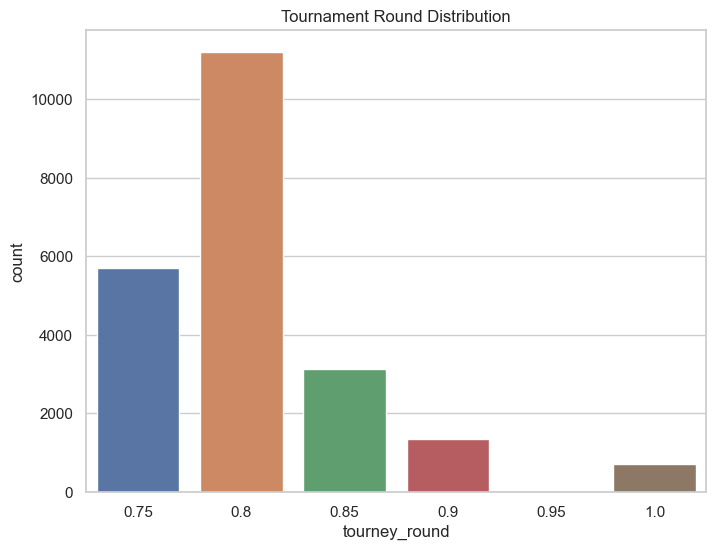

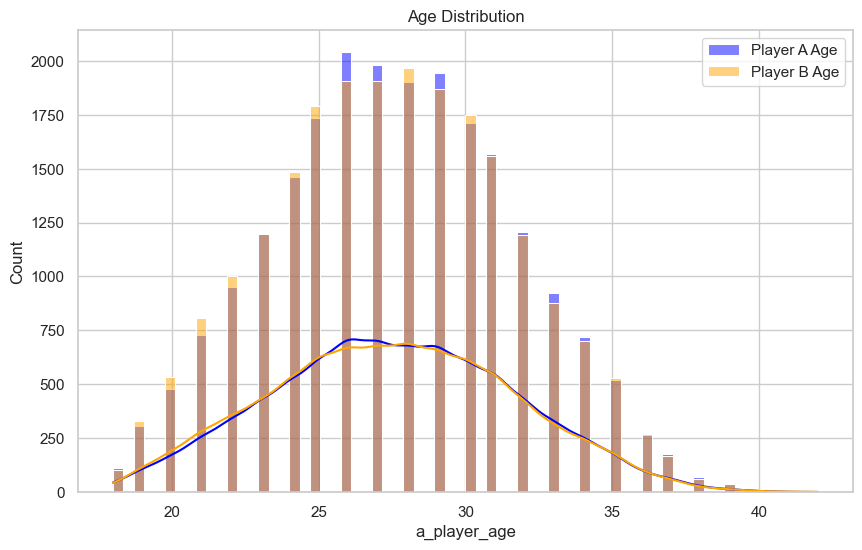

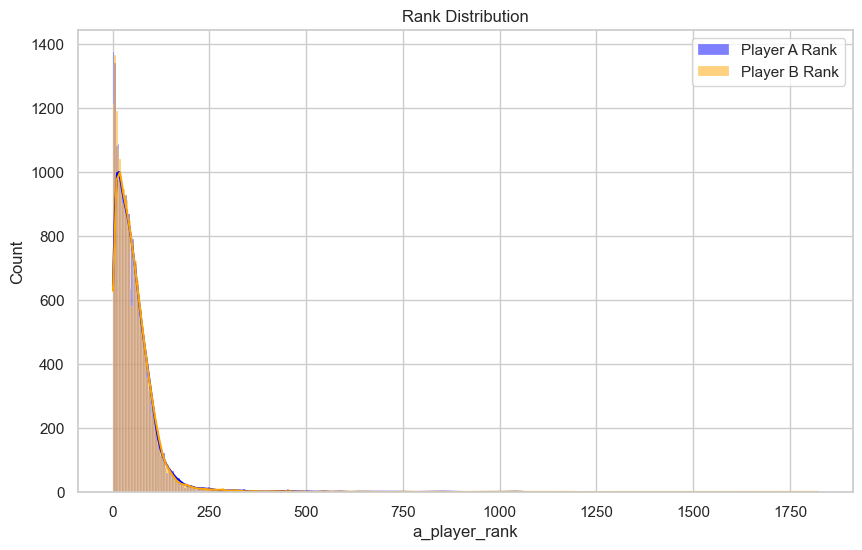

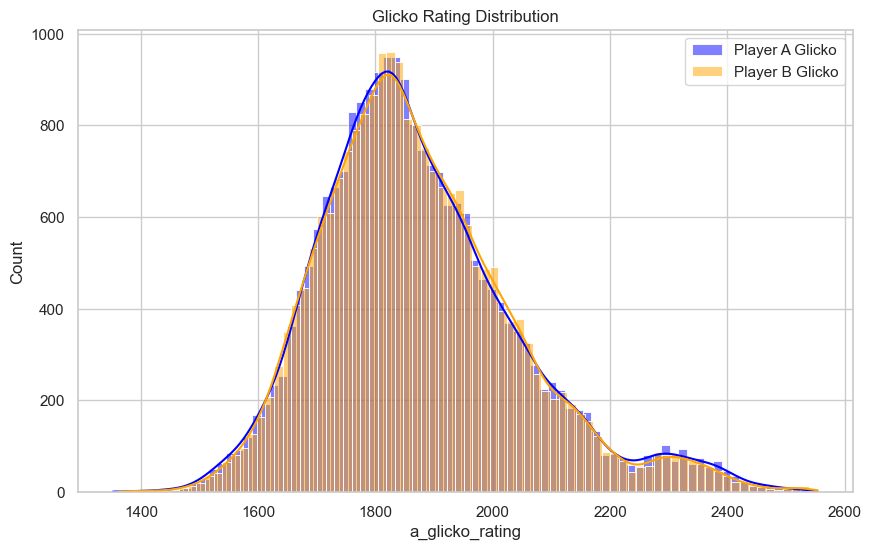

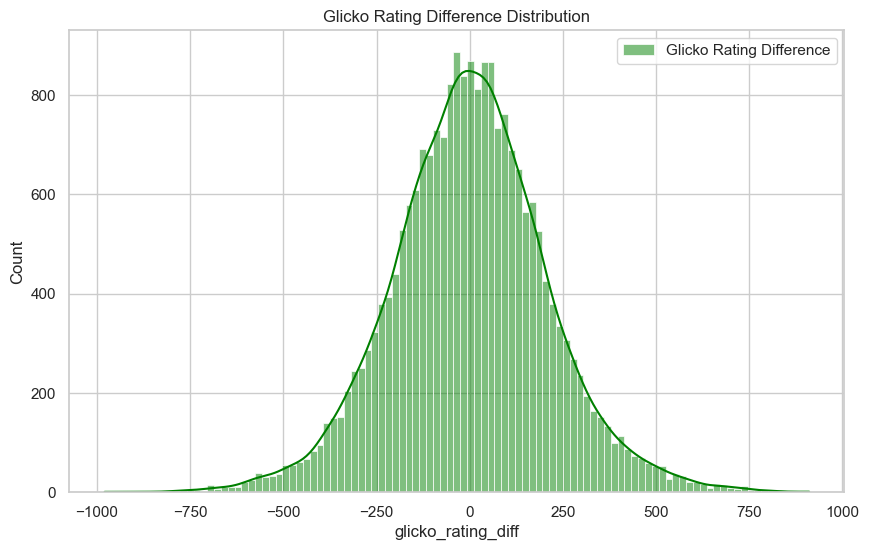

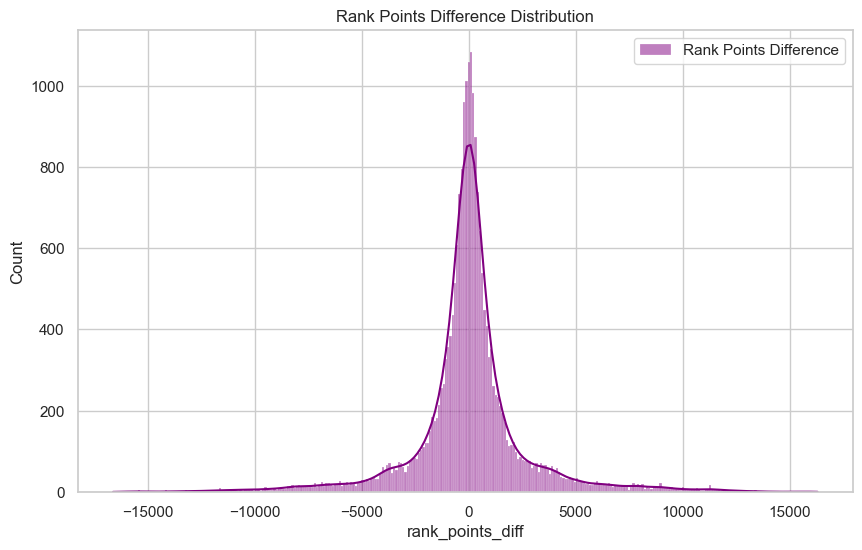

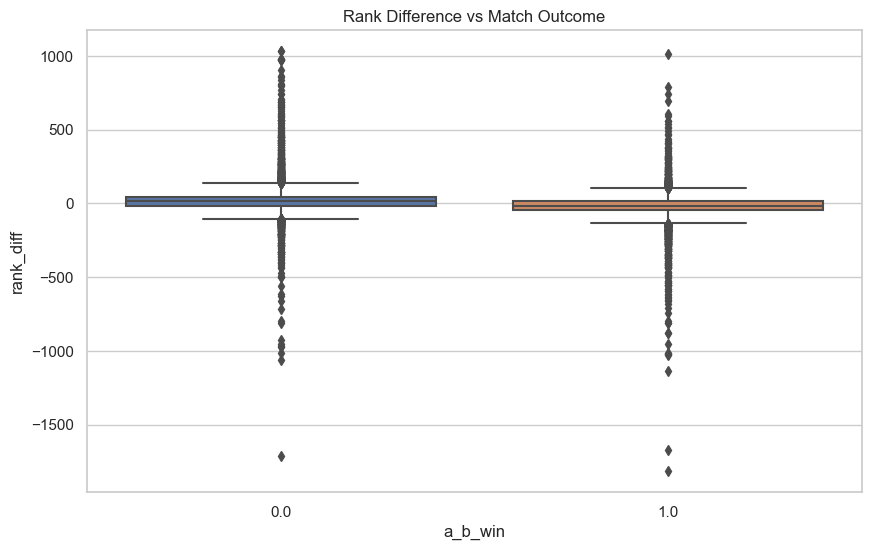

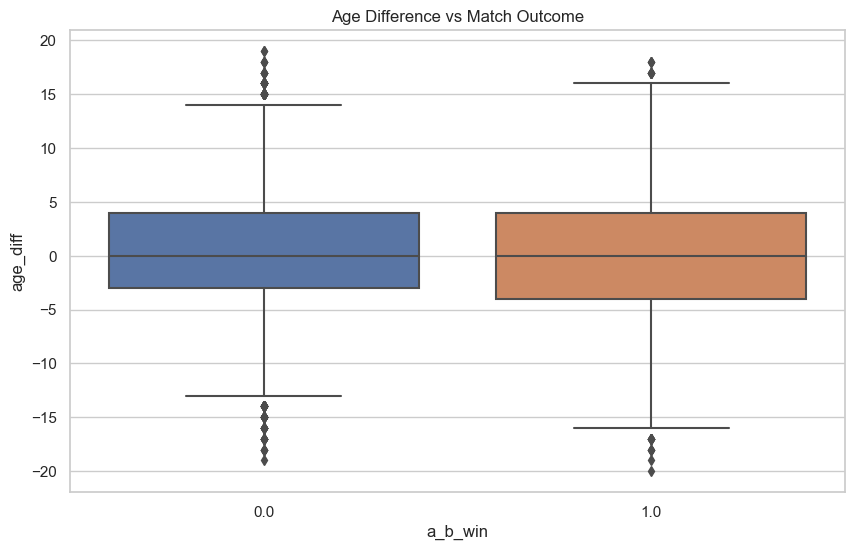

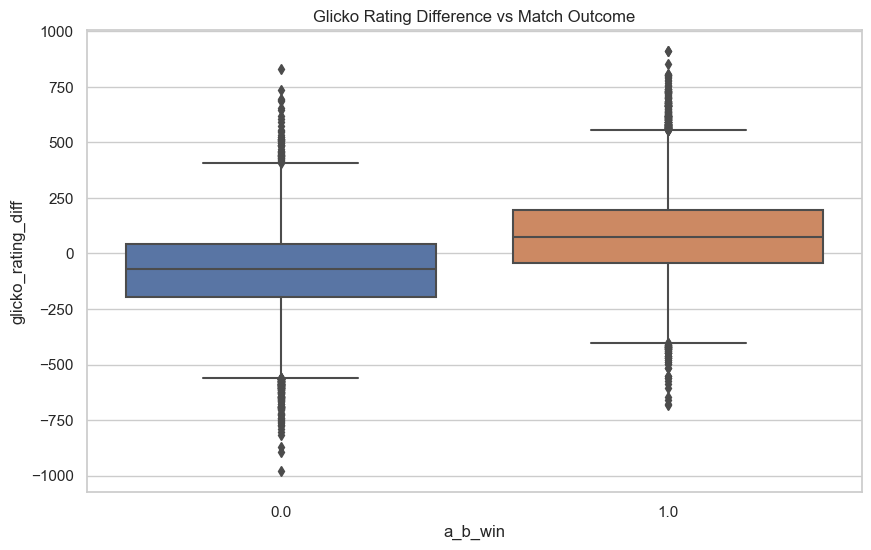

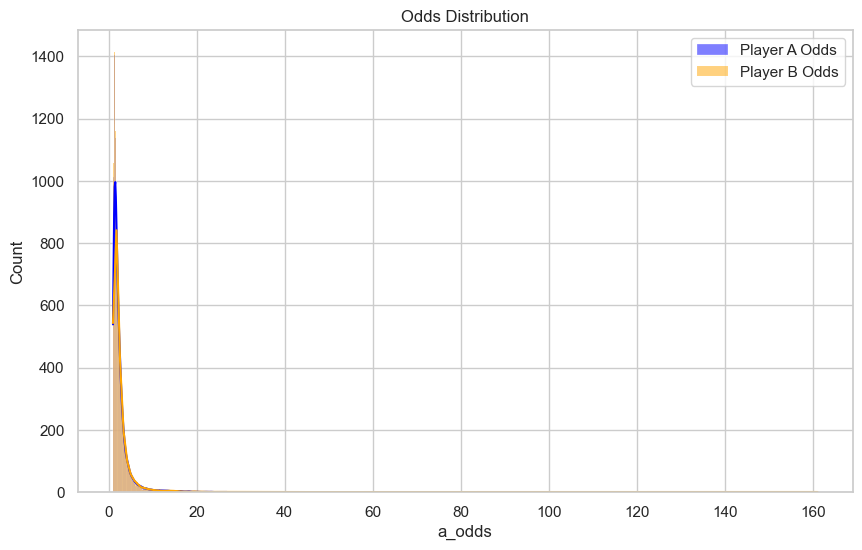

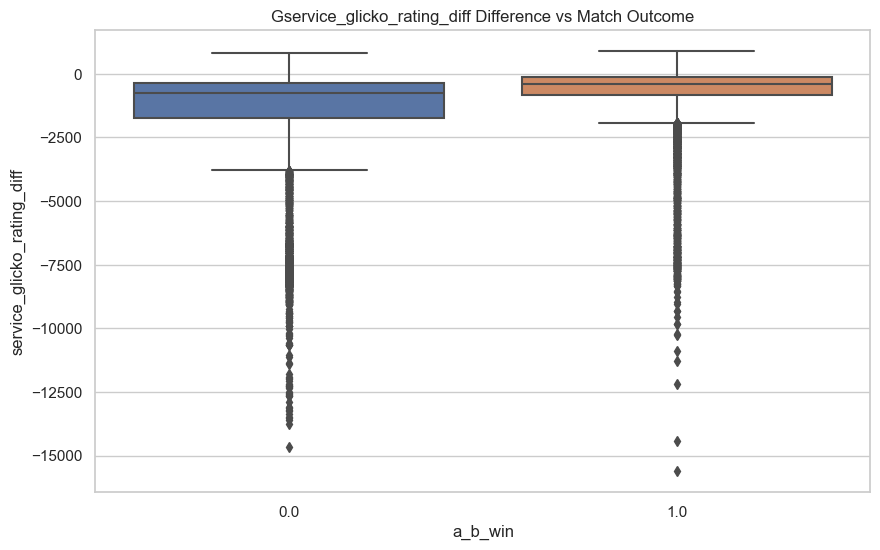

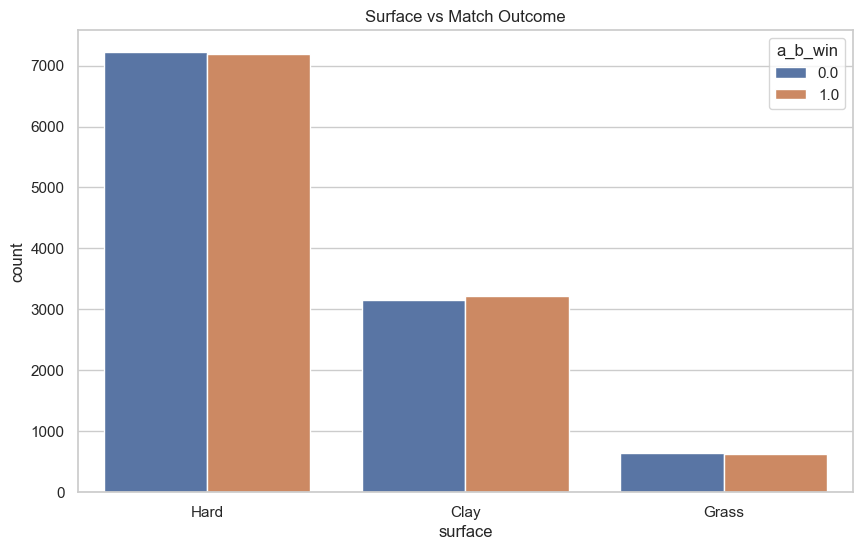

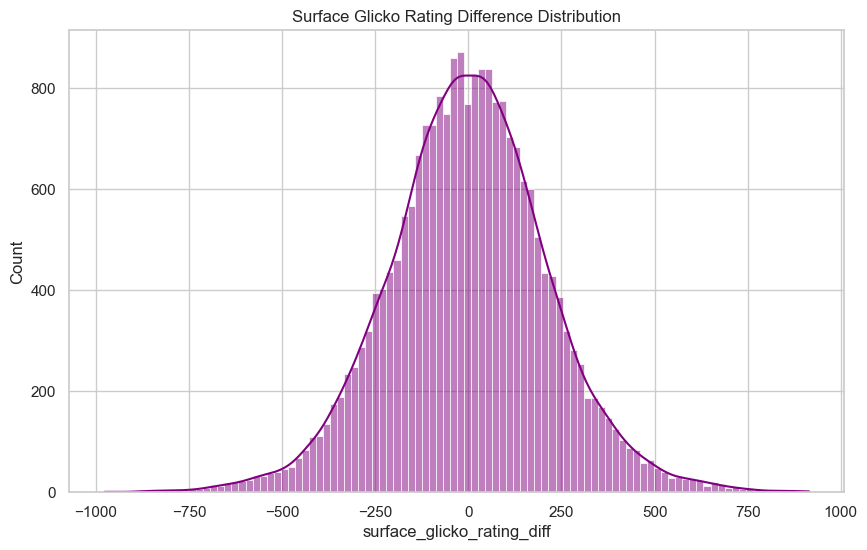

/var/folders/ml/c9m4gk2d5j1gjzt21jgb5d3r0000gn/T/ipykernel_67398/144445160.py:151: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


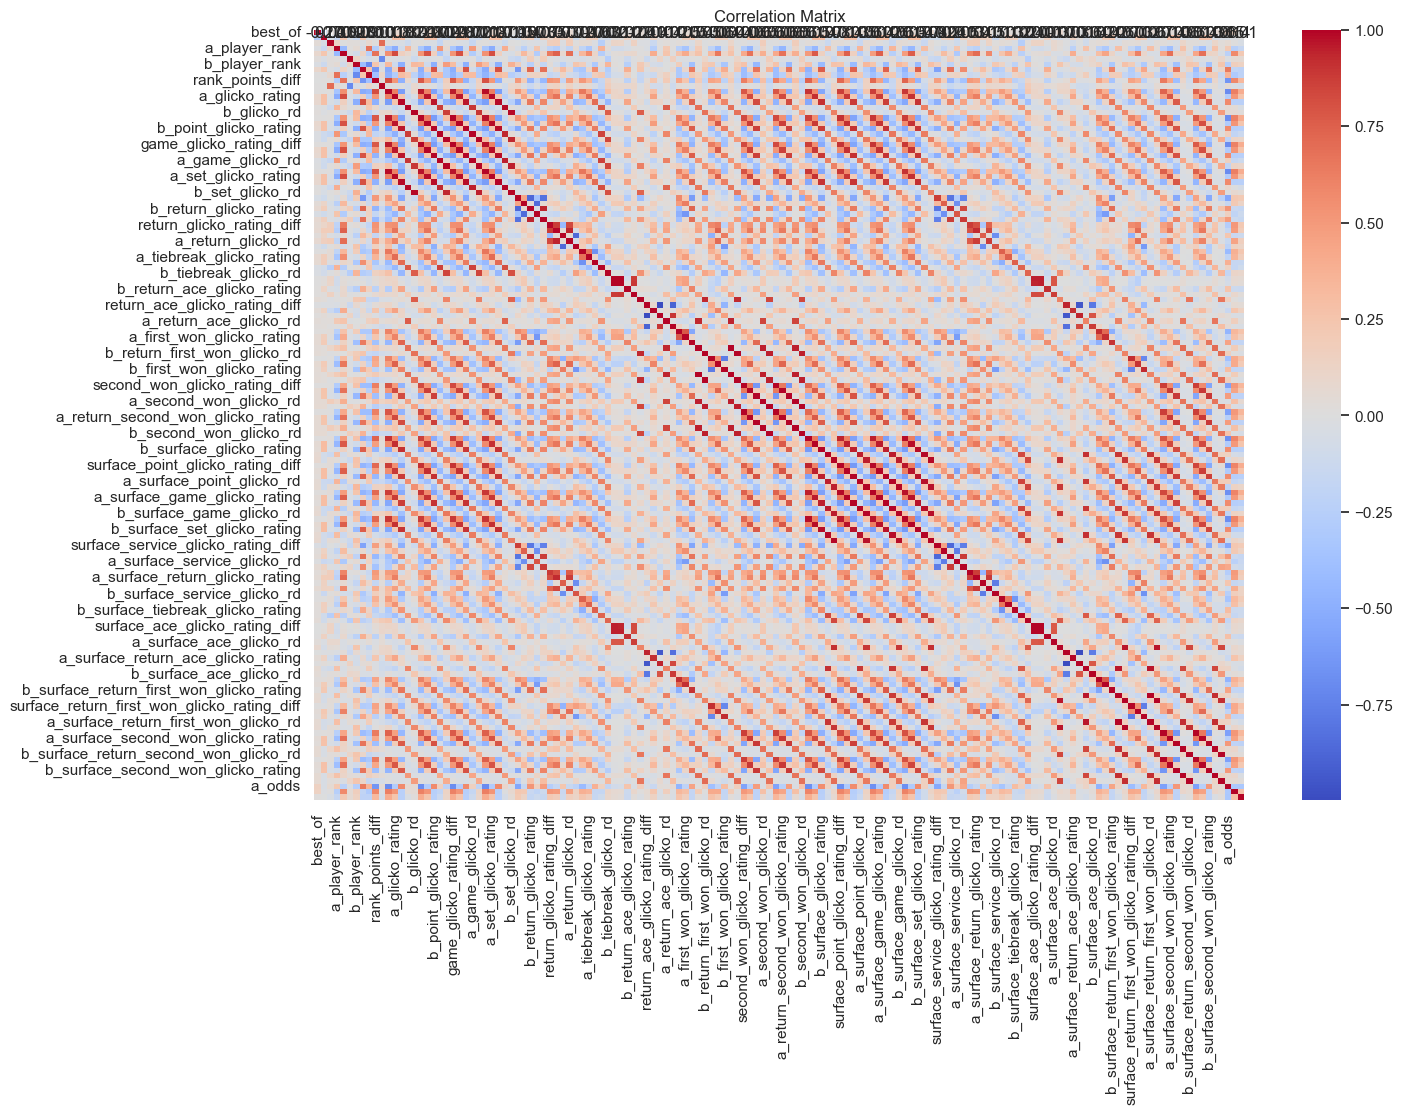

T-test for Glicko Rating Differences: t-statistic = 63.42617561107541, p-value = 0.0


In [10]:
# File: eda_tennis_match.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from scipy.stats import ttest_ind

# Setting plot styles
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('../testcsvs/glickoUpdated.csv')

start = '20120101'
end = '20231231'
match_type = 'm'

start_date = datetime.strptime(start, '%Y%m%d').date()
end_date = datetime.strptime(end, '%Y%m%d').date()

RD_CUTOFF = 125

df = pd.read_csv('../testcsvs/glickoUpdated.csv')
df['tourney_date'] = pd.to_datetime(df['tourney_date']).dt.date
df = df[(df['tourney_date'] >= start_date) & (df['tourney_date'] <= end_date)]
df = df[(df['a_surface_glicko_rd'] <= RD_CUTOFF) & (df['b_surface_glicko_rd'] <= RD_CUTOFF) & (df['a_glicko_rd'] <= RD_CUTOFF) & (df['b_glicko_rd'] <= RD_CUTOFF)]

df = df.drop(['tourney_id','match_num', 'tourney_name', 'tourney_date', 'a_player_name', 'b_player_name', 'a_player_id', 'a_player_slug', 'b_player_id', 'b_player_slug', 'sets', 'games','tiebreaks'], axis=1)


print(df.head())
print(df.info())
print(df.describe())

# 2. Missing Data
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# 3. Categorical Features
# Tourney Name
# plt.figure(figsize=(10, 6))
# sns.countplot(y='tourney_name', data=df, order=df['tourney_name'].value_counts().index)
# plt.title('Tournament Distribution')
# plt.show()

# Surface
plt.figure(figsize=(8, 6))
sns.countplot(x='surface', data=df)
plt.title('Surface Distribution')
plt.show()

# Tourney Round
plt.figure(figsize=(8, 6))
sns.countplot(x='tourney_round', data=df)
plt.title('Tournament Round Distribution')
plt.show()

# 4. Numerical Features
# Player Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['a_player_age'], kde=True, color='blue', label='Player A Age')
sns.histplot(df['b_player_age'], kde=True, color='orange', label='Player B Age')
plt.title('Age Distribution')
plt.legend()
plt.show()

# Player Ranks
plt.figure(figsize=(10, 6))
sns.histplot(df['a_player_rank'], kde=True, color='blue', label='Player A Rank')
sns.histplot(df['b_player_rank'], kde=True, color='orange', label='Player B Rank')
plt.title('Rank Distribution')
plt.legend()
plt.show()

# Glicko Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['a_glicko_rating'], kde=True, color='blue', label='Player A Glicko')
sns.histplot(df['b_glicko_rating'], kde=True, color='orange', label='Player B Glicko')
plt.title('Glicko Rating Distribution')
plt.legend()
plt.show()

# Glicko Rating Differences
plt.figure(figsize=(10, 6))
sns.histplot(df['glicko_rating_diff'], kde=True, color='green', label='Glicko Rating Difference')
plt.title('Glicko Rating Difference Distribution')
plt.legend()
plt.show()

# Rank Points Differences
plt.figure(figsize=(10, 6))
sns.histplot(df['rank_points_diff'], kde=True, color='purple', label='Rank Points Difference')
plt.title('Rank Points Difference Distribution')
plt.legend()
plt.show()

# 5. Player Performance Analysis
# Rank difference vs Match Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='a_b_win', y='rank_diff', data=df)
plt.title('Rank Difference vs Match Outcome')
plt.show()

# Age difference vs Match Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='a_b_win', y='age_diff', data=df)
plt.title('Age Difference vs Match Outcome')
plt.show()

# Glicko Rating Difference vs Match Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='a_b_win', y='glicko_rating_diff', data=df)
plt.title('Glicko Rating Difference vs Match Outcome')
plt.show()

# Odds Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['a_odds'], kde=True, color='blue', label='Player A Odds')
sns.histplot(df['b_odds'], kde=True, color='orange', label='Player B Odds')
plt.title('Odds Distribution')
plt.legend()
plt.show()

# 6. Surface-Specific Analysis
# Surface vs Match Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='a_b_win', y='age_diff', data=df)
plt.title('Age Difference vs Match Outcome')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='surface', hue='a_b_win', data=df)
plt.title('Surface vs Match Outcome')
plt.show()

# Surface Glicko Rating Differences
plt.figure(figsize=(10, 6))
sns.histplot(df['surface_glicko_rating_diff'], kde=True, color='purple')
plt.title('Surface Glicko Rating Difference Distribution')
plt.show()

# 7. Correlation Analysis
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 8. Statistical Testing
# Perform a t-test to compare Glicko ratings for wins vs losses
win_glicko = df[df['a_b_win'] == 1]['glicko_rating_diff']
loss_glicko = df[df['a_b_win'] == 0]['glicko_rating_diff']

t_stat, p_value = ttest_ind(win_glicko, loss_glicko)
print(f'T-test for Glicko Rating Differences: t-statistic = {t_stat}, p-value = {p_value}')

# 9. Feature Engineering
# Creating new features like experience difference (based on age), normalized rank differences, etc.
df['experience_diff'] = df['a_player_age'] - df['b_player_age']
df['normalized_rank_diff'] = df['rank_diff'] / (df['a_player_rank'] + df['b_player_rank'])

# 10. Predictive Modeling Preparation
# Prepare data for modeling (e.g., logistic regression)
# Dropping non-numerical columns for simplicity
model_df = df.drop(columns=['surface'])

# Handling missing values
model_df = model_df.fillna(model_df.mean())

# Splitting data into features and target
X = model_df.drop(columns=['a_b_win'])
y = model_df['a_b_win']

# Normalize the feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

